## 📝 Executive Summary

This project analyzes the CDC’s BRFSS 2015 dataset (~250,000 respondents) to explore
**patterns in diabetes prevalence** across demographics, lifestyle, comorbidities,
and healthcare access.

Key findings include:
- **BMI and age** are the strongest correlates of diabetes, with prevalence rising
  sharply in older and higher-BMI groups.
- **Diabetics report more poor physical and mental health days**, reflecting the
  chronic health burden of the disease.
- **Socioeconomic disparities** are evident: lower-income groups show higher
  prevalence of diabetes.
- **Hypertension, high cholesterol, heart disease, and stroke** are significantly
  more common among diabetics, highlighting comorbidity risks.
- Lifestyle factors such as **physical inactivity, poor diet, and smoking**
  cluster strongly with diabetes.

This notebook represents **Phase 1 (Exploratory Data Analysis)** of a
three-phase project:
1. Phase 1 – EDA & visualization of diabetes patterns (this notebook)
2. Phase 2 – Analytical study of drug efficacy in diabetes treatment
3. Phase 3 – Predictive modeling of diabetes risk using machine learning

As a medical doctor transitioning into data science, I connect
**clinical expertise** with **analytical methods**, uncovering insights
that bridge public health data with real-world medical understanding.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/diabetes_2015.csv')

pd.set_option('display.max_columns', 22)

In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [5]:
Diabetes_map = {
    0: 'Non-Diabetes',
    1: 'Prediabetes',
    2: 'Diabetes'
}

df['Diabetes_label'] = df['Diabetes_012'].map(Diabetes_map)

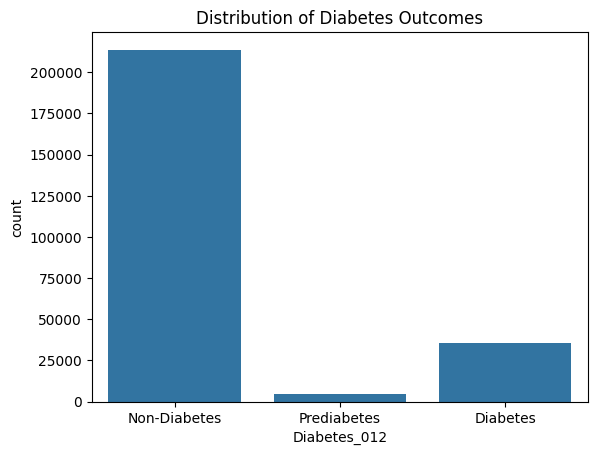

In [6]:
sns.countplot(x='Diabetes_012', data=df)
plt.xticks([0,1,2], ["Non-Diabetes", "Prediabetes", "Diabetes"])
plt.title("Distribution of Diabetes Outcomes")
plt.show()

Most respondents are non-diabetic, while prediabetes and diabetes account for a smaller but significant share of the population. This confirms that diabetes remains a major public health issue despite being less common than non-diabetes.

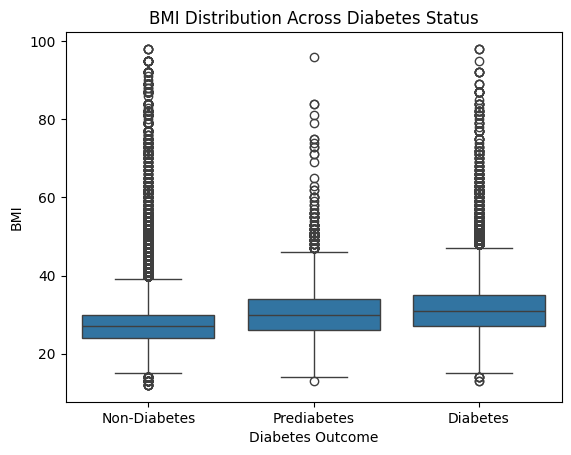

In [7]:
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.xticks([0,1,2], ["Non-Diabetes", "Prediabetes", "Diabetes"])
plt.title("BMI Distribution Across Diabetes Status")
plt.ylabel("BMI")
plt.xlabel("Diabetes Outcome")
plt.show()

Individuals with diabetes show a higher median BMI compared to non-diabetics and prediabetics. This aligns with the established link between obesity and diabetes risk.

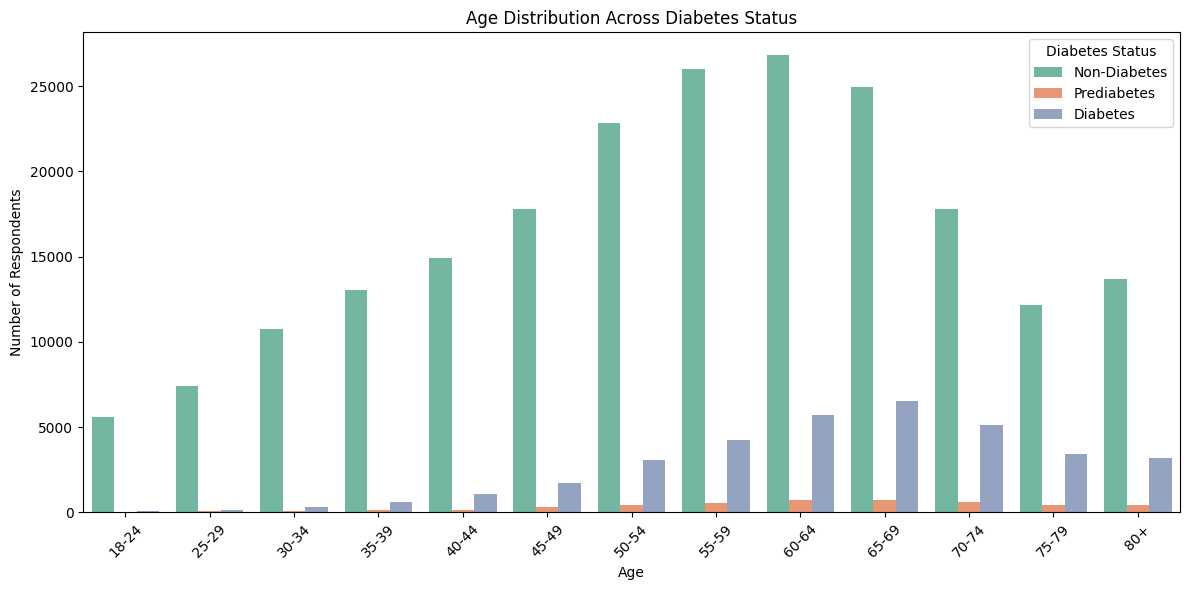

In [8]:
age_map = {
    1: "18-24", 2: "25-29", 3: "30-34", 4: "35-39", 
    5: "40-44", 6: "45-49", 7: "50-54", 8: "55-59", 
    9: "60-64", 10: "65-69", 11: "70-74", 12: "75-79", 13: "80+"
}
df['Age_label'] = df['Age'].map(age_map)

plt.figure(figsize=(12,6))
sns.countplot(x='Age_label', hue='Diabetes_012', data=df, palette="Set2",
                  order=["18-24","25-29","30-34","35-39","40-44","45-49", 
                         "50-54","55-59","60-64","65-69","70-74","75-79","80+"])
plt.xticks(rotation=45)
plt.xlabel("Age")
plt.ylabel("Number of Respondents")
plt.title("Age Distribution Across Diabetes Status")
plt.legend(title="Diabetes Status", labels=["Non-Diabetes", "Prediabetes", "Diabetes"])
plt.tight_layout()
plt.show()

The prevalence of diabetes increases sharply with age. Prediabetes is more common in middle age, while diabetes rises significantly in older populations.

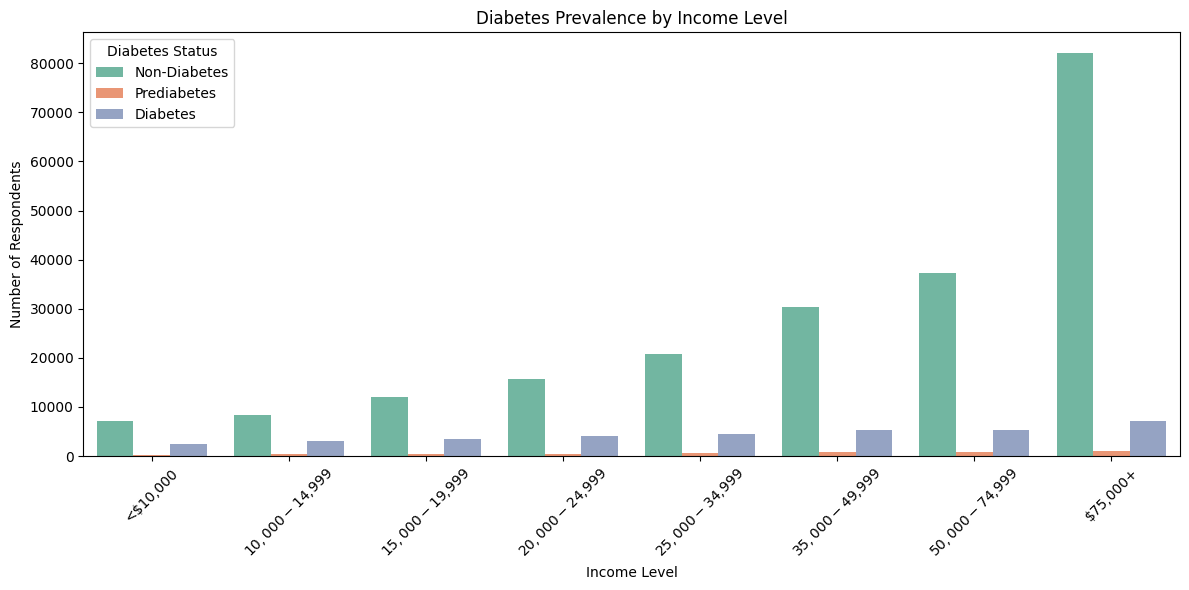

In [20]:
income_map = {
    1: "<$10,000", 2: "$10,000-$14,999", 3: "$15,000-$19,999", 
    4: "$20,000-$24,999", 5: "$25,000-$34,999", 6: "$35,000-$49,999", 
    7: "$50,000-$74,999", 8: "$75,000+"
}
df['Income_label'] = df['Income'].map(income_map)
plt.figure(figsize=(12,6))
sns.countplot(x='Income_label', hue='Diabetes_012', data=df, palette="Set2", order=["<$10,000", "$10,000-$14,999", "$15,000-$19,999", 
                                                                                         "$20,000-$24,999", "$25,000-$34,999",
                                                                                         "$35,000-$49,999", "$50,000-$74,999", "$75,000+"])
plt.xticks(rotation=45)
plt.xlabel("Income Level")
plt.ylabel("Number of Respondents")
plt.title("Diabetes Prevalence by Income Level")
plt.legend(title="Diabetes Status", labels=["Non-Diabetes", "Prediabetes", "Diabetes"])
plt.tight_layout()
plt.show()

Lower income groups show a higher prevalence of diabetes, suggesting that socioeconomic status is a significant determinant of health outcomes.

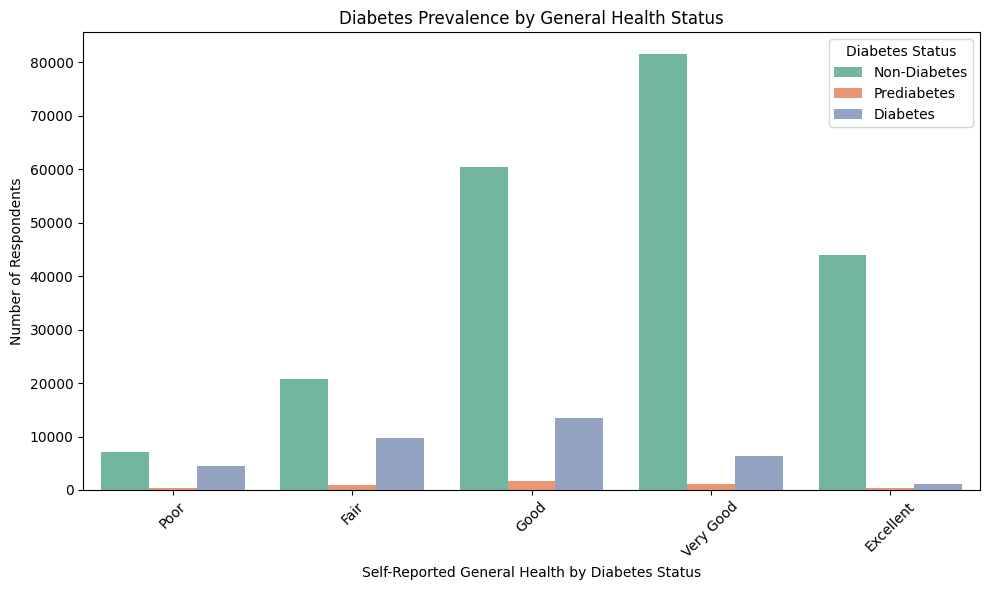

In [10]:
genhlth_map = {
    1: "Excellent",
    2: "Very Good",
    3: "Good",
    4: "Fair",
    5: "Poor"
}
df['GenHlth_label'] = df['GenHlth'].map(genhlth_map)
plt.figure(figsize=(10,6))
sns.countplot(x='GenHlth_label', hue='Diabetes_012', data=df, palette="Set2", order=["Poor", "Fair", "Good", "Very Good", "Excellent"])
plt.xticks(rotation=45)
plt.xlabel("Self-Reported General Health by Diabetes Status")
plt.ylabel("Number of Respondents")
plt.title("Diabetes Prevalence by General Health Status")
plt.legend(title="Diabetes Status", labels=["Non-Diabetes", "Prediabetes", "Diabetes"])
plt.tight_layout()
plt.show()

Diabetics report worse general health more frequently than non-diabetics, with many rating their health as “Fair” or “Poor.”

/var/folders/bg/4ythw_qj51q7y1b44njv2wx40000gp/T/ipykernel_3590/724765350.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_012', y='MentHlth', data=df, palette="Set2")


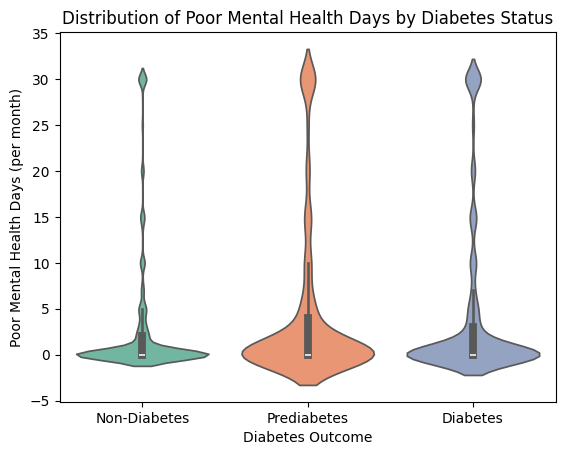

In [11]:
sns.violinplot(x='Diabetes_012', y='MentHlth', data=df, palette="Set2")
plt.xticks([0,1,2], ["Non-Diabetes", "Prediabetes", "Diabetes"])
plt.title("Distribution of Poor Mental Health Days by Diabetes Status")
plt.ylabel("Poor Mental Health Days (per month)")
plt.xlabel("Diabetes Outcome")
plt.show()

Diabetics report a higher spread and average of poor mental health days compared to non-diabetics, suggesting an association between diabetes and psychological burden.

/var/folders/bg/4ythw_qj51q7y1b44njv2wx40000gp/T/ipykernel_3590/70366573.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Diabetes_012', y='PhysHlth', data=df, ci=95, palette="Set2")
/var/folders/bg/4ythw_qj51q7y1b44njv2wx40000gp/T/ipykernel_3590/70366573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Diabetes_012', y='PhysHlth', data=df, ci=95, palette="Set2")


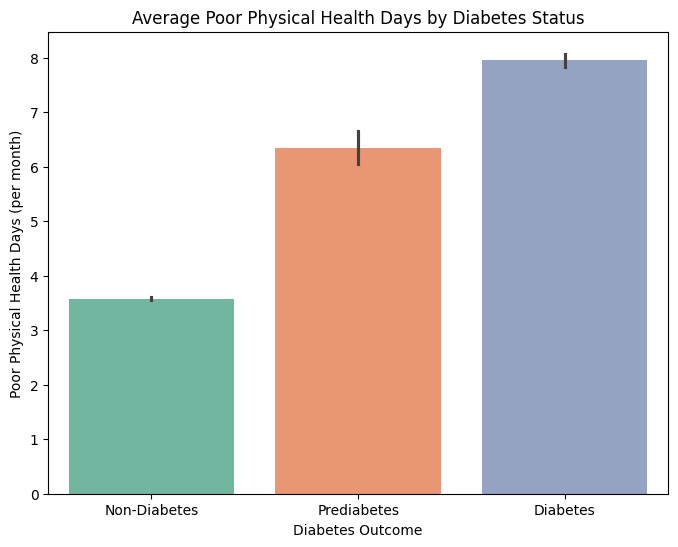

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x='Diabetes_012', y='PhysHlth', data=df, ci=95, palette="Set2")
plt.xticks([0,1,2], ["Non-Diabetes", "Prediabetes", "Diabetes"])
plt.title("Average Poor Physical Health Days by Diabetes Status")
plt.ylabel("Poor Physical Health Days (per month)")
plt.xlabel("Diabetes Outcome")
plt.show()

Diabetics experience substantially more poor physical health days per month, reflecting the chronic health burden of the disease.

In [13]:
def countplot_percentage_within_diabetes(df, col, target="Diabetes_012",
                                         hue_labels=None,
                                         diabetes_labels=["Non-Diabetes","Prediabetes","Diabetes"],
                                         figsize=(8,5), rotation=0,
                                         title=None):
    """
    Draws a grouped countplot of a categorical variable vs diabetes,
    with percentages annotated **within each diabetes group**.

    Parameters:
        df             : DataFrame
        col            : Categorical column (string)
        target         : Target column (default = "Diabetes_012")
        hue_labels     : List of labels for hue categories (e.g., ["No","Yes"])
        diabetes_labels: Labels for diabetes classes (x-axis)
        figsize        : Figure size
        rotation       : Rotation of x-axis labels
        title          : Plot title
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=target, hue=col, data=df, palette="Set2")

    totals = df.groupby(target)[col].count()

    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        x = p.get_x() + p.get_width()/2
        group_index = int(round(p.get_x()))
        total = totals.iloc[group_index]
        percent = 100 * height / total
        ax.annotate(f'{percent:.1f}%', (x, height), ha='center', va='bottom', fontsize=10)

    plt.xticks([0,1,2], diabetes_labels, rotation=rotation)
    plt.xlabel("Diabetes Status")
    plt.ylabel("Number of Respondents")
    
    if title:
        plt.title(title)
    else:
        plt.title(f"{col} by Diabetes Status (Percentages)")
    
    if hue_labels:
        plt.legend(title=col, labels=hue_labels)
    else:
        plt.legend(title=col)
    
    plt.tight_layout()
    plt.show()

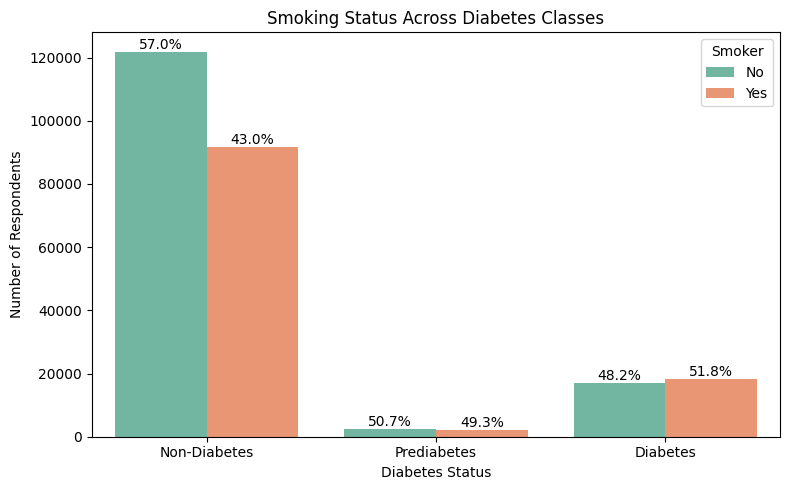

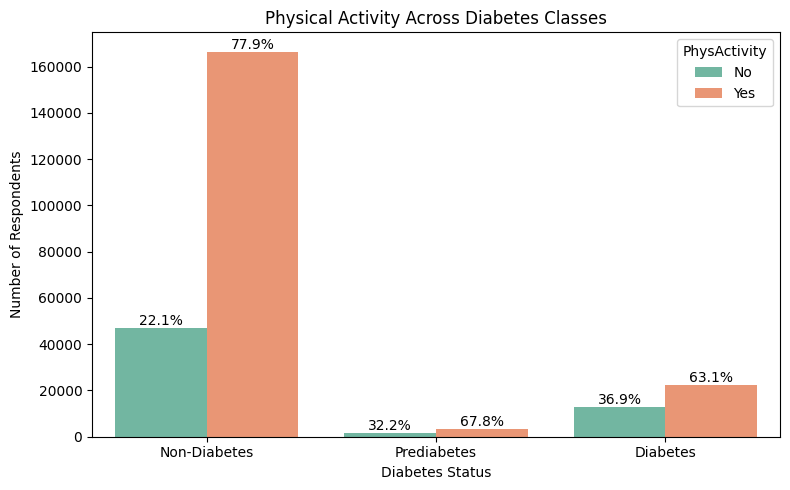

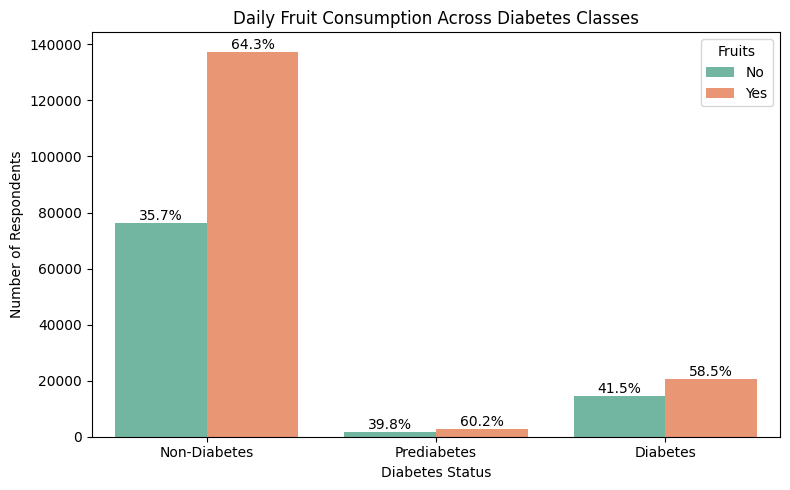

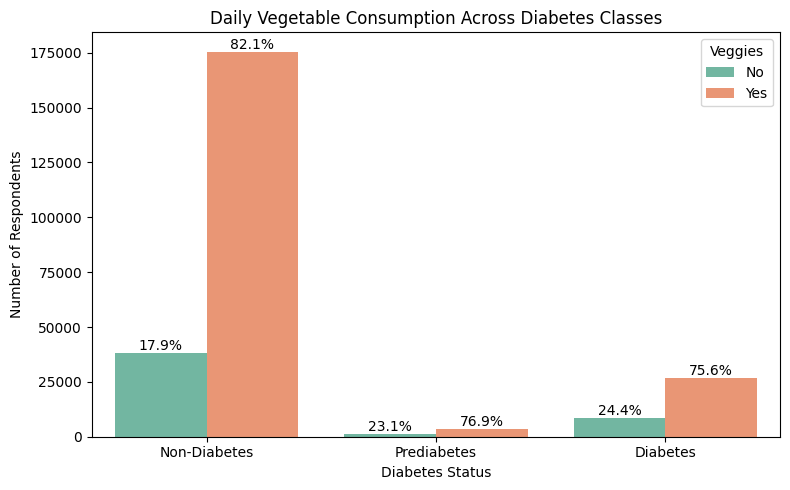

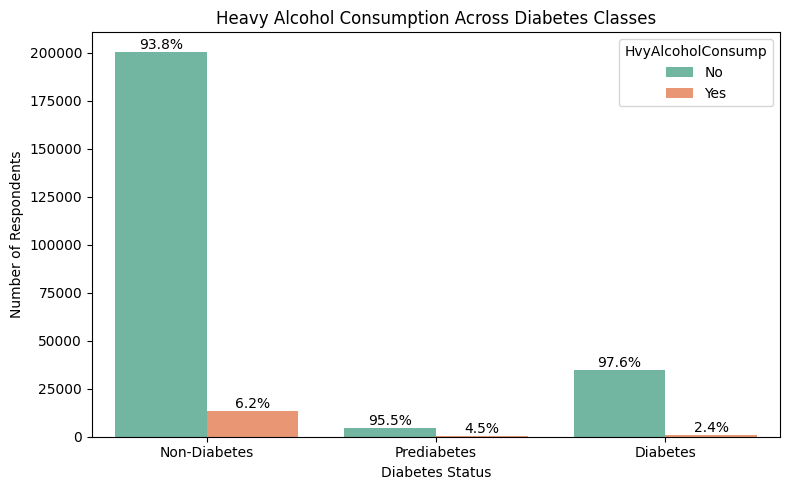

In [14]:
countplot_percentage_within_diabetes(df, "Smoker", hue_labels=["No","Yes"],
                                     title="Smoking Status Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "PhysActivity", hue_labels=["No","Yes"],
                                     title="Physical Activity Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "Fruits", hue_labels=["No","Yes"],
                                     title="Daily Fruit Consumption Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "Veggies", hue_labels=["No","Yes"],
                                     title="Daily Vegetable Consumption Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "HvyAlcoholConsump", hue_labels=["No","Yes"],
                                     title="Heavy Alcohol Consumption Across Diabetes Classes")

### Lifestyle Factors and Diabetes

Lifestyle plays a critical role in the development and management of diabetes.  
Several key behavioral patterns emerge from the BRFSS 2015 dataset:

- **Smoking:**  
  Diabetics show a slightly higher prevalence of smoking compared to non-diabetics.  
  Smoking contributes to vascular damage and increases cardiovascular risk, which is already elevated in diabetics.

- **Physical Inactivity:**  
  Lack of physical activity is significantly more common in diabetics.  
  Sedentary behavior is a known risk factor for insulin resistance and worsens glycemic control.

- **Diet (Fruit and Vegetable Consumption):**  
  Lower consumption of fruits and vegetables is observed in diabetics.  
  This highlights the role of poor dietary patterns in both diabetes prevention and progression.

- **Heavy Alcohol Consumption:**  
  While less strongly associated than obesity or inactivity, excessive alcohol use may worsen metabolic control and liver function, compounding risks in diabetics.

📌 **Clinical takeaway:**  
Diabetes prevention and management strategies must focus heavily on **smoking cessation, physical activity promotion, and dietary improvements**, in addition to medical therapy.

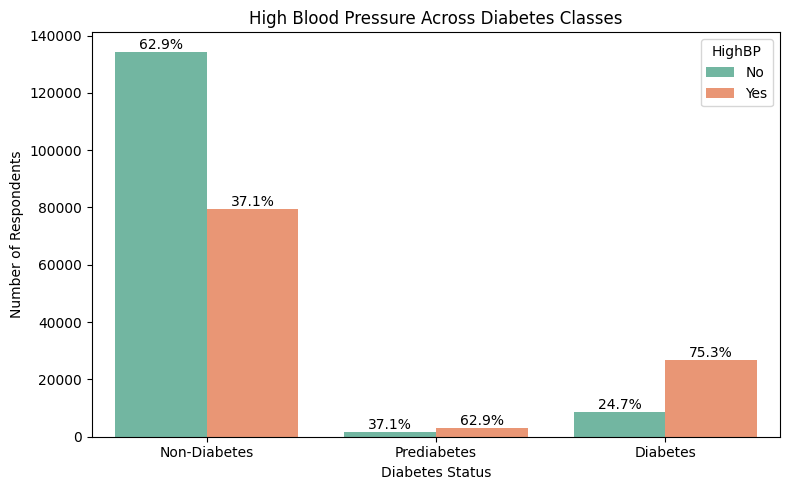

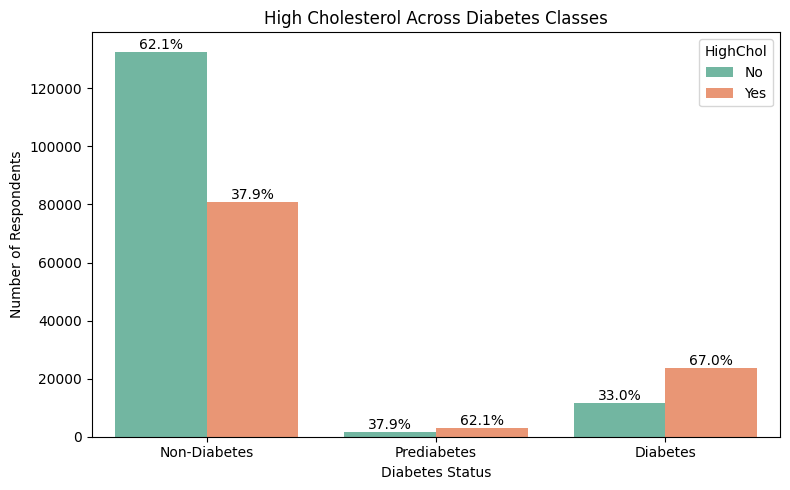

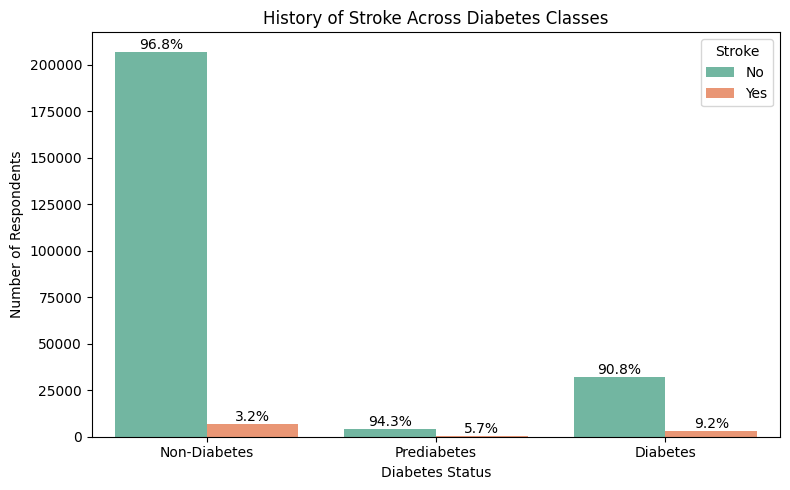

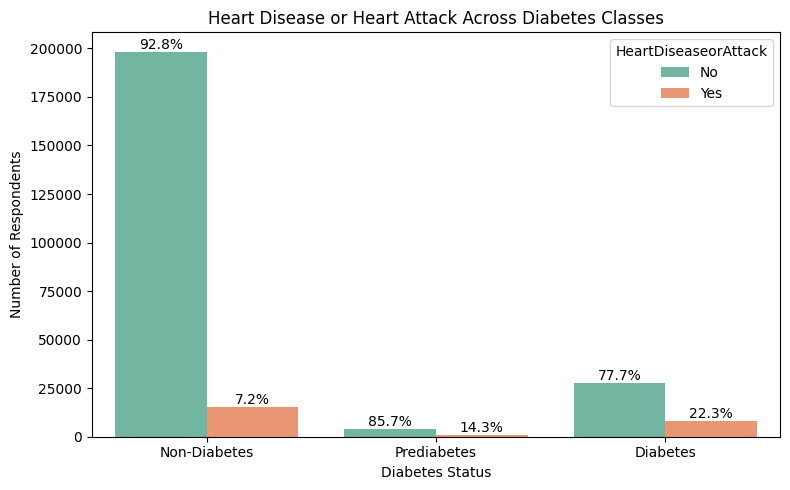

In [21]:
countplot_percentage_within_diabetes(df, "HighBP", hue_labels=["No","Yes"],
                                     title="High Blood Pressure Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "HighChol", hue_labels=["No","Yes"],
                                     title="High Cholesterol Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "Stroke", hue_labels=["No","Yes"],
                                     title="History of Stroke Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "HeartDiseaseorAttack", hue_labels=["No","Yes"],
                                     title="Heart Disease or Heart Attack Across Diabetes Classes")

### Comorbidities and Diabetes

Diabetes rarely exists in isolation — it is closely linked with several chronic conditions.  
The dataset reveals striking patterns:

- **Hypertension (High Blood Pressure):**  
  Highly prevalent in diabetics, consistent with metabolic syndrome clustering.  
  Hypertension management is critical to reduce cardiovascular complications.

- **High Cholesterol:**  
  Elevated cholesterol is significantly more common among diabetics, further compounding cardiovascular risk.

- **Stroke:**  
  Diabetics report higher incidence of stroke, aligning with the known cerebrovascular complications of long-standing diabetes.

- **Heart Disease and Heart Attack:**  
  Diabetics are disproportionately affected by cardiovascular events.  
  This reinforces the importance of aggressive risk factor management.

📌 **Clinical takeaway:**  
Diabetes management must extend beyond glucose control to include **blood pressure, lipid management, and cardiovascular risk reduction**.  
This holistic view aligns with real-world clinical practice guidelines.

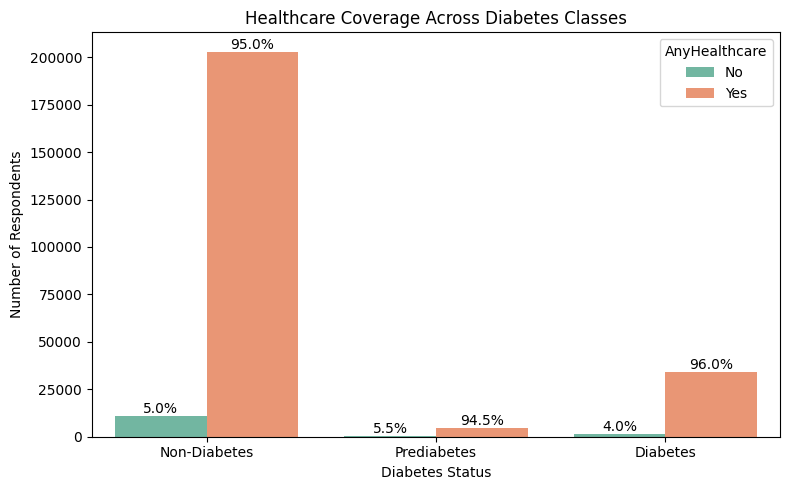

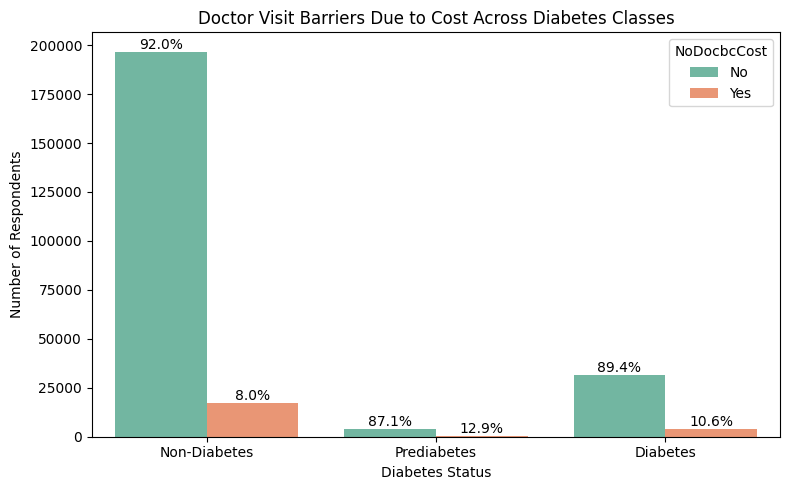

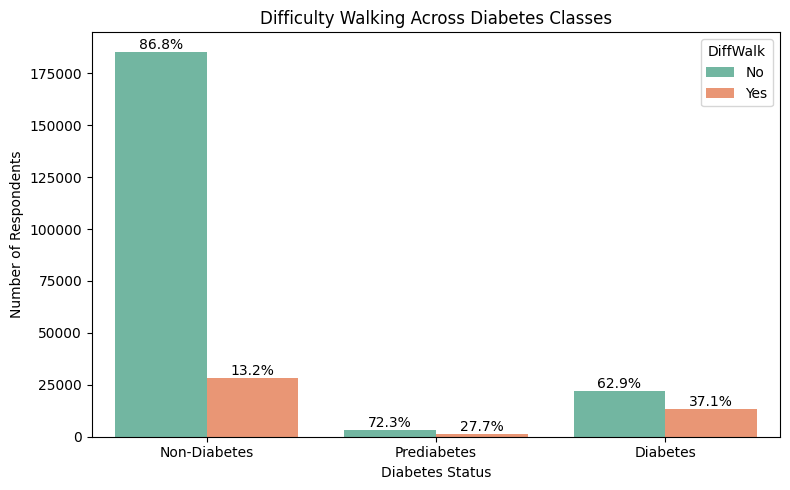

In [15]:
countplot_percentage_within_diabetes(df, "AnyHealthcare", hue_labels=["No","Yes"],
                                     title="Healthcare Coverage Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "NoDocbcCost", hue_labels=["No","Yes"],
                                     title="Doctor Visit Barriers Due to Cost Across Diabetes Classes")

countplot_percentage_within_diabetes(df, "DiffWalk", hue_labels=["No","Yes"],
                                     title="Difficulty Walking Across Diabetes Classes")

### Healthcare Access and Functional Limitations

Access to healthcare and functional status are critical components of diabetes outcomes.  
The BRFSS 2015 dataset highlights several important disparities:

**Healthcare Coverage (AnyHealthcare):**  
  Healthcare coverage is very high overall, but slightly **higher among diabetics (96%) than non-diabetics (95%)**.  
  This may reflect greater healthcare needs and higher enrollment in Medicare/Medicaid among older diabetic adults.

- **Doctor Visit Barriers (NoDocbcCost):**  
  Diabetics are more likely to report being unable to see a doctor due to cost.  
  Financial barriers directly limit access to early interventions, medication adherence, and routine follow-ups — all essential for diabetes control.

- **Difficulty Walking (DiffWalk):**  
  A significantly higher proportion of diabetics report difficulty walking compared to non-diabetics.  
  This reflects complications such as obesity, peripheral neuropathy, and vascular disease, which impair mobility and quality of life.

📌 **Clinical takeaway:**  
High coverage does not eliminate access barriers. Even insured diabetics face financial constraints and functional limitations, which complicate effective disease management.

<Axes: xlabel='MentHlth', ylabel='BMI'>

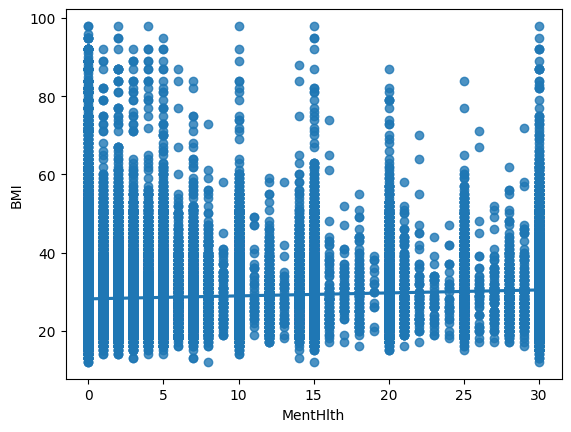

In [17]:
sns.regplot(data=df, x='MentHlth', y='BMI')

The relationship between BMI and poor mental health days is weak but slightly positive, suggesting that higher BMI may contribute modestly to poorer mental health.

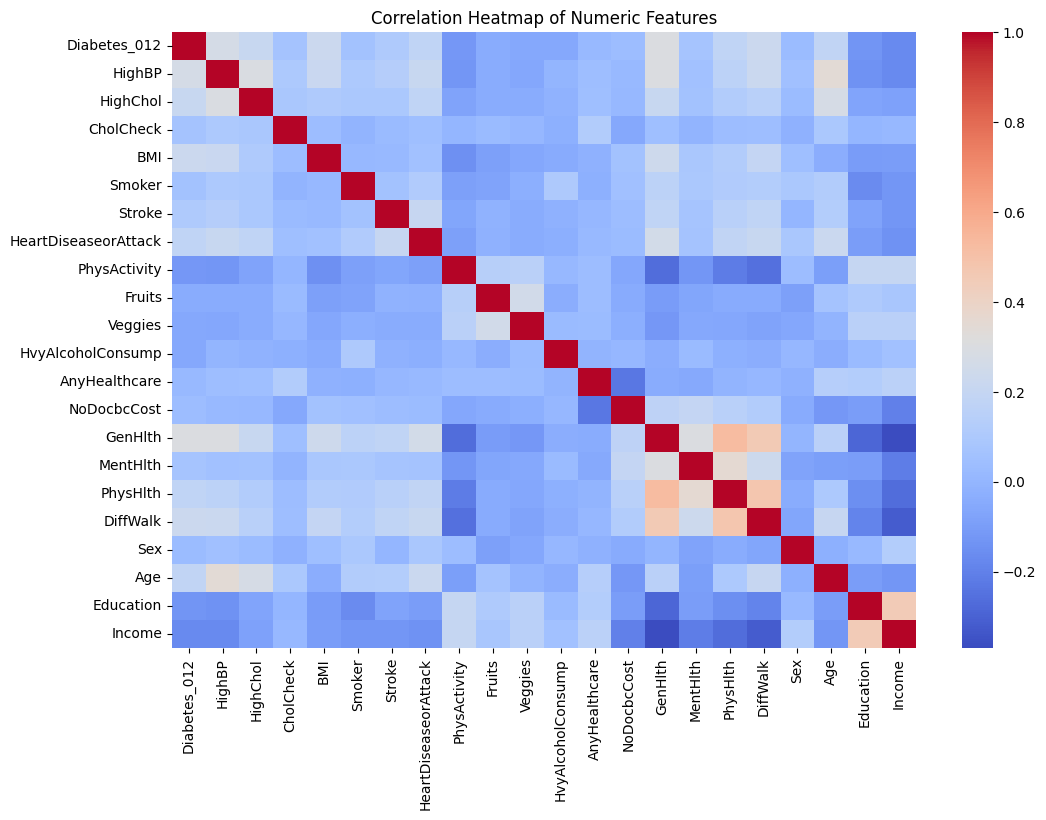

In [18]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

BMI and Age show the strongest positive correlations with diabetes outcome. Other features show weaker correlations, indicating that diabetes risk is multifactorial.